In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/car_table1a.csv", low_memory=False)
filtered_df = df[['Year','quarter','city1',
       'city2','nsmiles','passengers','carrier_lg','carrier_low','lf_ms','fare','fare_lg','fare_low']]

filtered_df = filtered_df.rename(columns={'city1':'Departure City',
       'city2':'Arrival City','nsmiles':'Distance Nautical Miles','passengers':'Number of Passengers','carrier_lg':'Top Mkt Share Carrier','carrier_low':'Lowest Fare Carrier','lf_ms':'Lowest Fare Carrier Mkt Share','fare':'Average Fare','fare_lg':'TMSC Fare','fare_low':'Lowest Fare'})

In [3]:
def plot_xy(df, x, y, title):   
    x_axis = df[x]
    y_axis = df[y]
    
    plt.plot(x_axis, y_axis)
    plt.xlabel(x)
    #plt.ylabel(y)
    plt.title(title)
    plt.legend([y])
    plt.grid(True)
    plt.show()

In [4]:
def compare_plot(df, x, y1, y2, title):
    x_axis = df[x]
    y_1 = df[y1]
    y_2 = df[y2]
    
    plt.plot(x_axis, y_1)
    plt.plot(x_axis, y_2)
    plt.xlabel(x)
    # plt.ylabel(y)
    # plt.title(f'{y1},{y2} vs {x}')
    plt.title(title)
    plt.legend([y1, y2])
    plt.grid(False)
    plt.show()

In [31]:
def make_bar(df, x, y, title):
    x_axis = df[x]
    y_axis = df[y]

    colors = ['yellow', 'blue', 'red', 'green', 'orange']
    plt.bar(x_axis, y_axis, color=colors)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)
    plt.grid(False)
    plt.show()

In [6]:
def make_df(list_cities, list_airlines, agg_func):
    final_df = pd.DataFrame()
    for city, airline in zip(list_cities, list_airlines):
        mkt_df = filtered_df[(filtered_df['Departure City'] == city) & (filtered_df['Top Mkt Share Carrier'] == airline)].reset_index(drop=True)
        mkt_df = mkt_df.groupby(['Departure City', 'Top Mkt Share Carrier']).agg({'Lowest Fare Carrier Mkt Share': agg_func}).reset_index()
        final_df = pd.concat([final_df, mkt_df], ignore_index=True)
    return final_df

In [7]:
def main(list_cities, list_airlines, airline_names):

    for city, airline, airline_name in zip(list_cities, list_airlines, airline_names):
        
        new_df = filtered_df[(filtered_df['Departure City'] == city) & (filtered_df['Lowest Fare Carrier'] == airline)].reset_index(drop=True)
        new_df = new_df.groupby(['Year']).agg({'Average Fare': 'mean','Lowest Fare':'mean'}).reset_index()
        new_df['Avg/Low Fare Ratio'] = new_df['Average Fare']/new_df['Lowest Fare']
        # new_df = new_df[(new_df['Year'] >= 1998)].reset_index(drop=True)

        
        compare_plot(new_df, 'Year', 'Average Fare', 'Lowest Fare', f'{airline_name} ({airline}) Departing from {city}')
        plot_xy(new_df, 'Year', 'Avg/Low Fare Ratio', f'{airline} Avg/Low Fare Ratio vs Year')

    agg_funcs = ['median', 'mean']
    
    for agg_func in agg_funcs:
        bar_df = make_df(cities, airlines, agg_func)
        make_bar(bar_df, 'Top Mkt Share Carrier', 'Lowest Fare Carrier Mkt Share', f'{agg_func} Market Share of Flights at Airline HQ')

In [8]:
cities = ['Dallas/Fort Worth, TX', 'Chicago, IL', 'Atlanta, GA (Metropolitan Area)', 'New York City, NY (Metropolitan Area)', 'Minneapolis/St. Paul, MN']
airlines = ['WN', 'UA', 'DL', 'B6', 'SY']
airline_names = ['Southwest', 'United', 'Delta', 'Jet Blue', 'Sun Country']

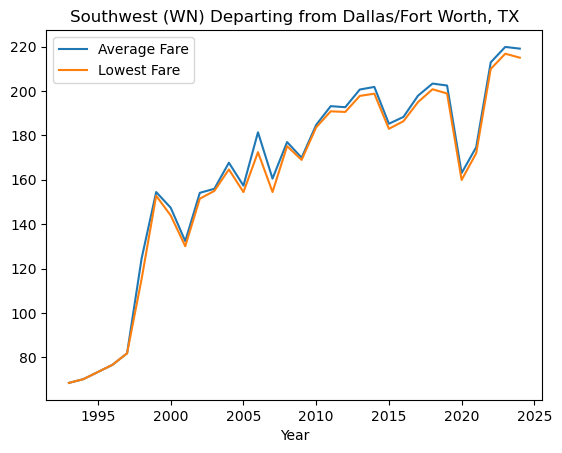

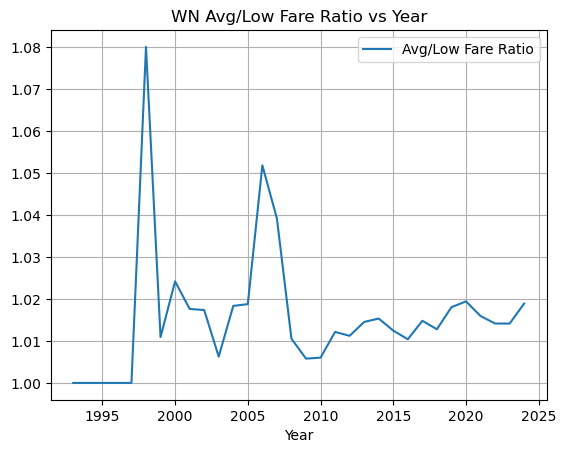

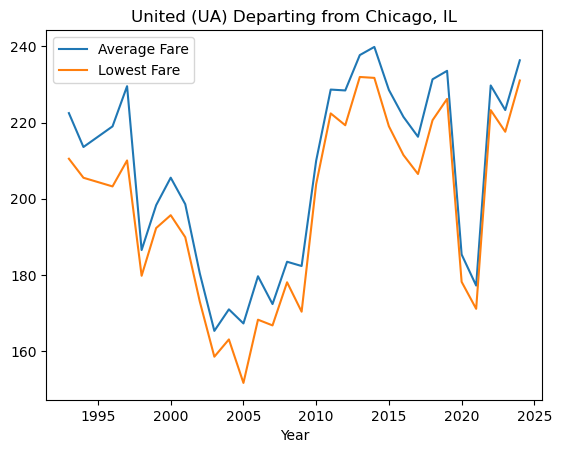

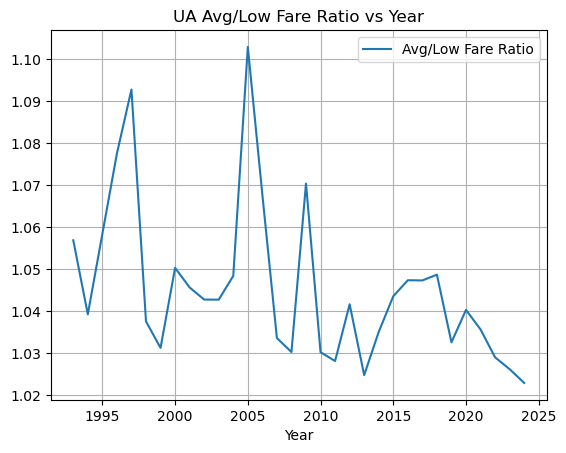

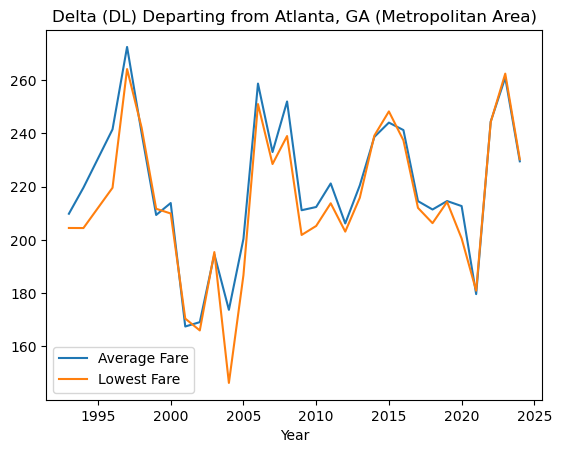

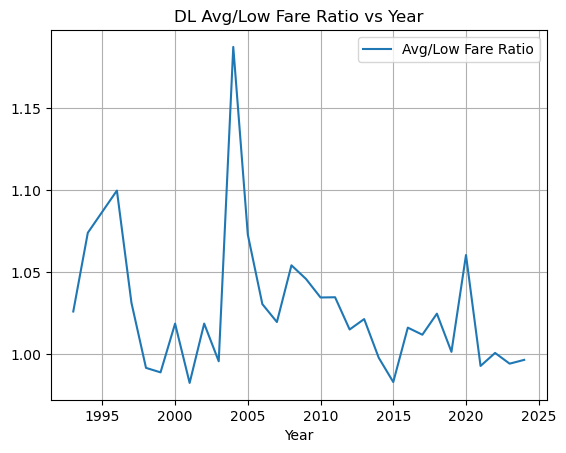

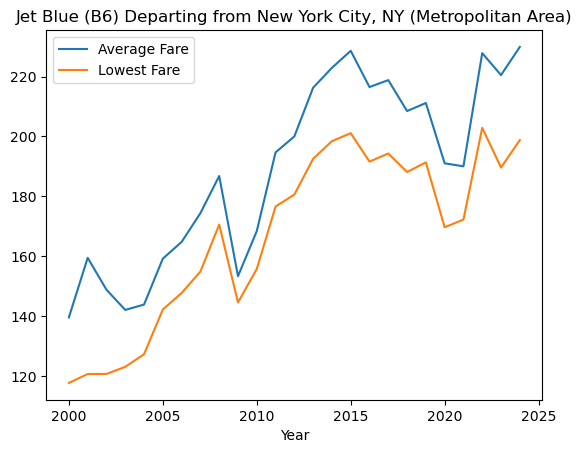

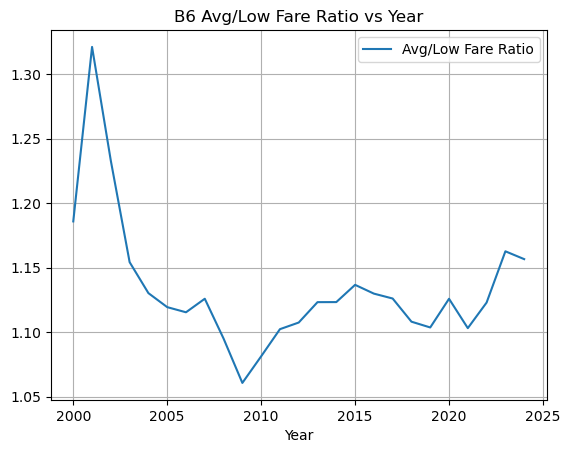

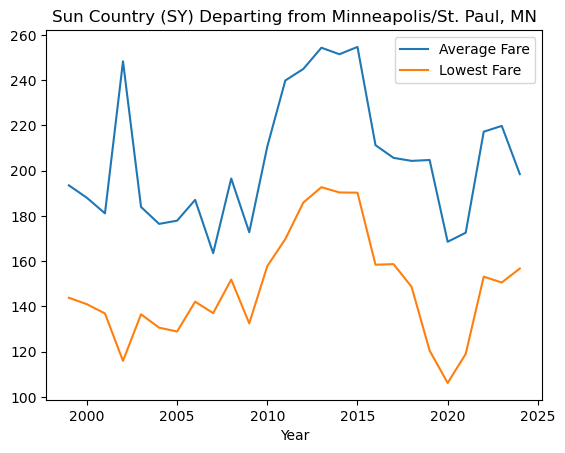

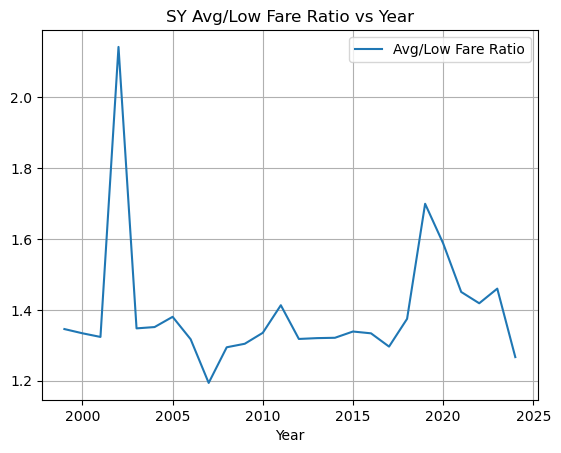

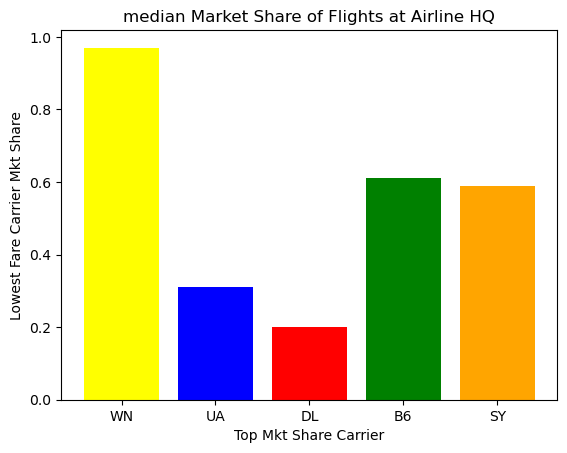

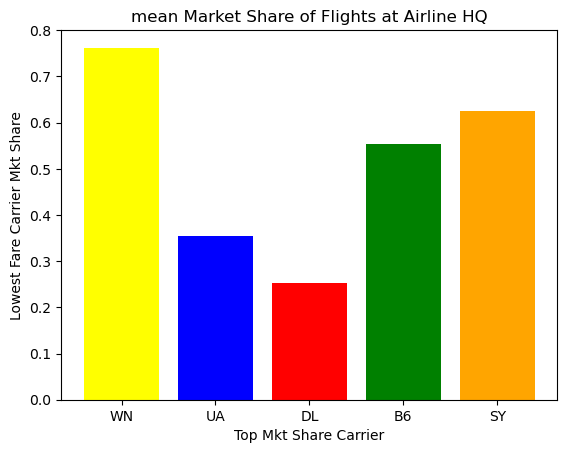

In [33]:
main(cities, airlines, airline_names)